Part 1

In [1]:
#1
import pandas as pd
data = pd.read_csv("/Users/ethanschultz/Downloads/insurance_costs_1.csv")
data.head()
data.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [2]:
#2
# make some dummy variables where appropriate
data = pd.get_dummies(data, columns=["sex", "smoker"], drop_first=True)
data

,age,bmi,region,charges,sex_male,smoker_yes
0,19,27.900,southwest,16884.92400,False,True
1,33,22.705,northwest,21984.47061,True,False
2,32,28.880,northwest,3866.85520,True,False
3,31,25.740,southeast,3756.62160,False,False
4,60,25.840,northwest,28923.13692,False,False
...,...,...,...,...,...,...
426,23,33.400,southwest,10795.93733,False,False
427,18,31.920,northeast,2205.98080,False,False
428,18,36.850,southeast,1629.83350,False,False
429,21,25.800,southwest,2007.94500,False,False


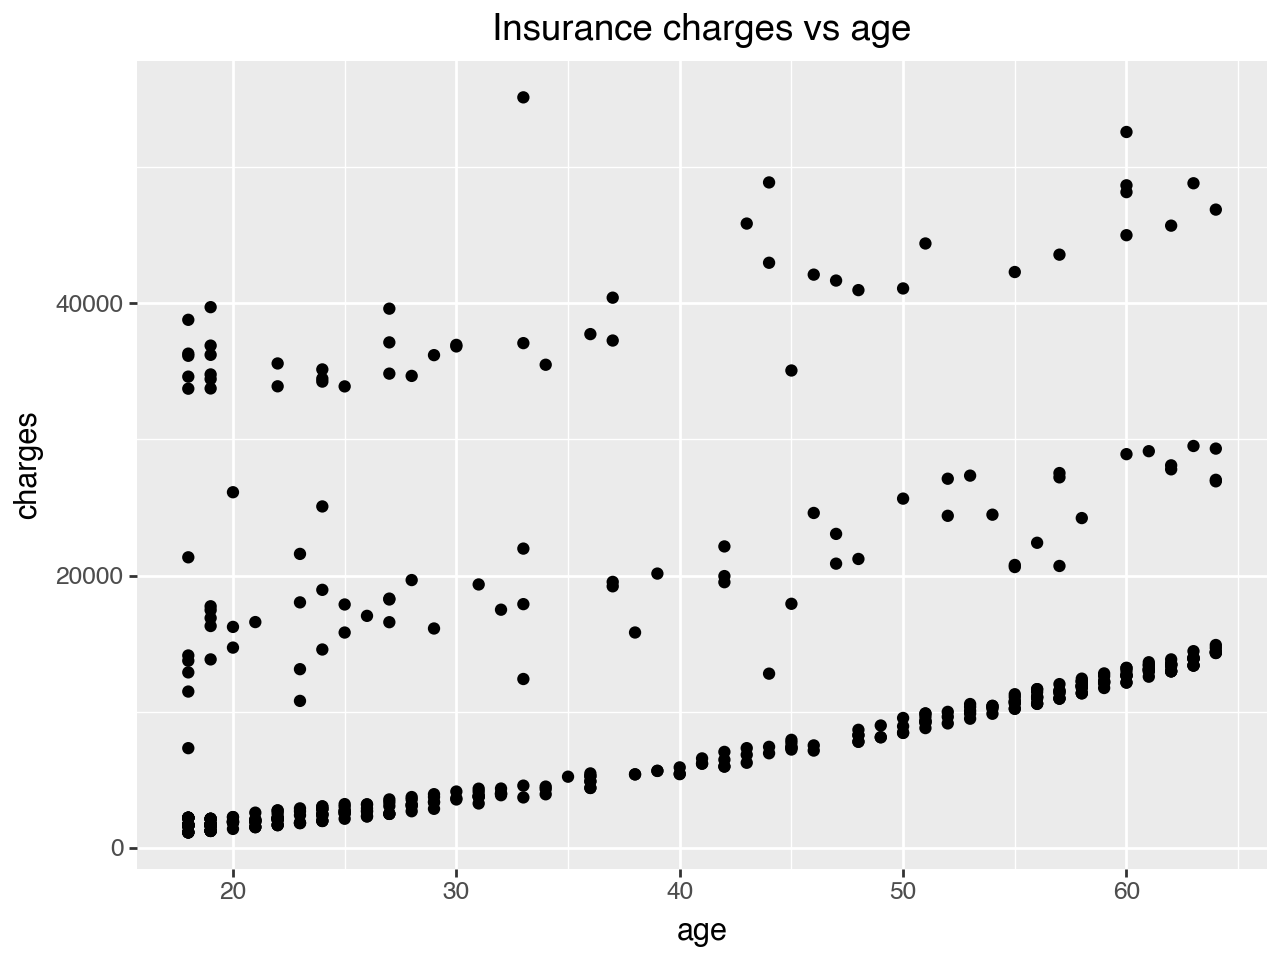

In [3]:
#3
import plotnine
from plotnine import *
(ggplot(data, aes(x="age", y="charges")) +
 geom_point() +
labs(title = "Insurance charges vs age")
)

We see that there is a linear positive relationship between charges and age suggesting that as someone gets older their insurance charges get greater which makes sense because older people are more risk prone with health issues.

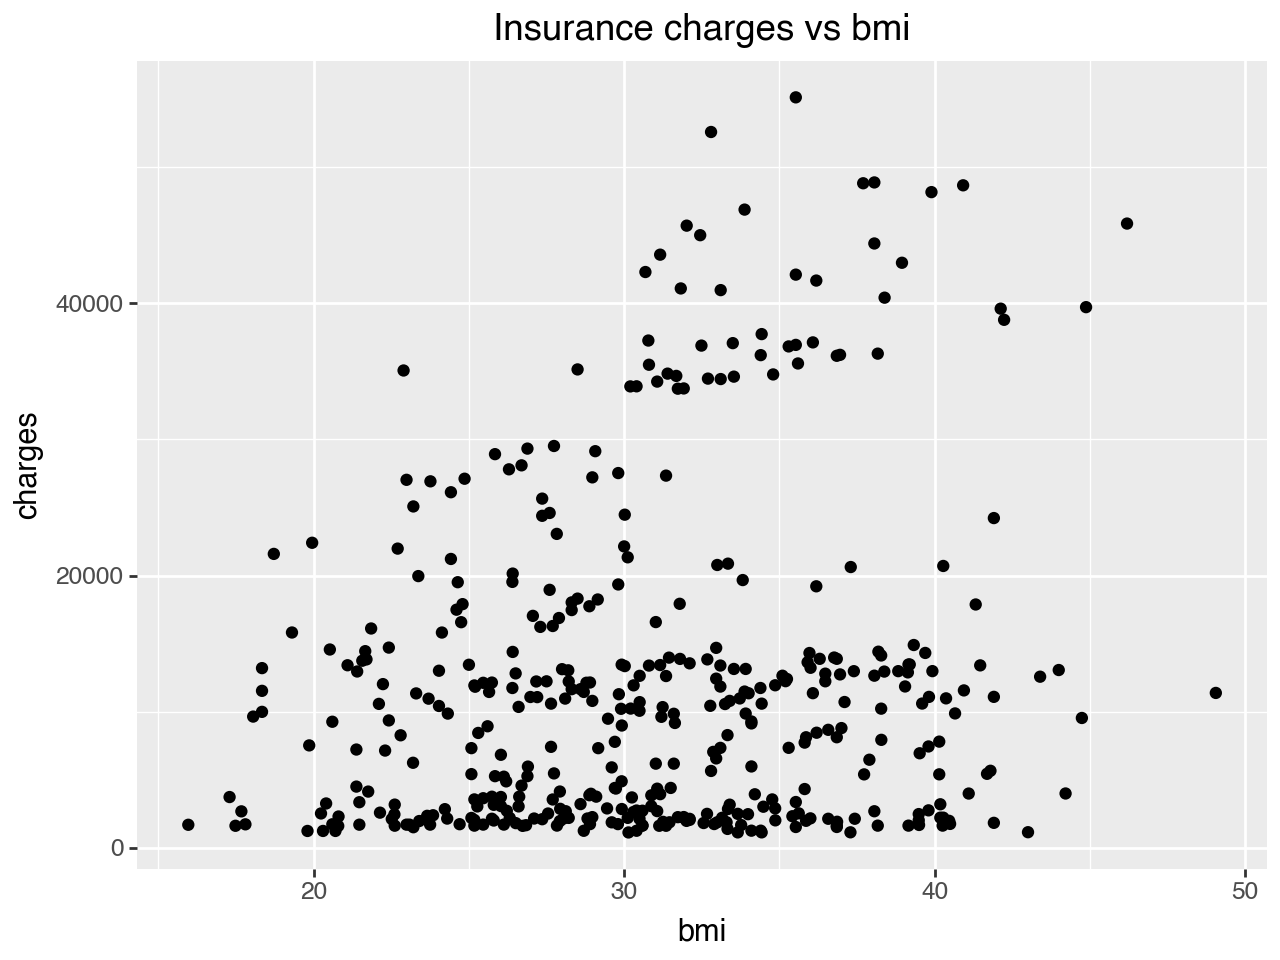

In [4]:
(ggplot(data, aes(x="bmi", y="charges")) +
 geom_point() +
labs(title = "Insurance charges vs bmi")
)

In this plot we see a slight positive linear trend with bmi and insurance charges. People with higher bmi tend to have higher insurance costs, insurance companies might see them as generally being overwight and more prone to health risks.

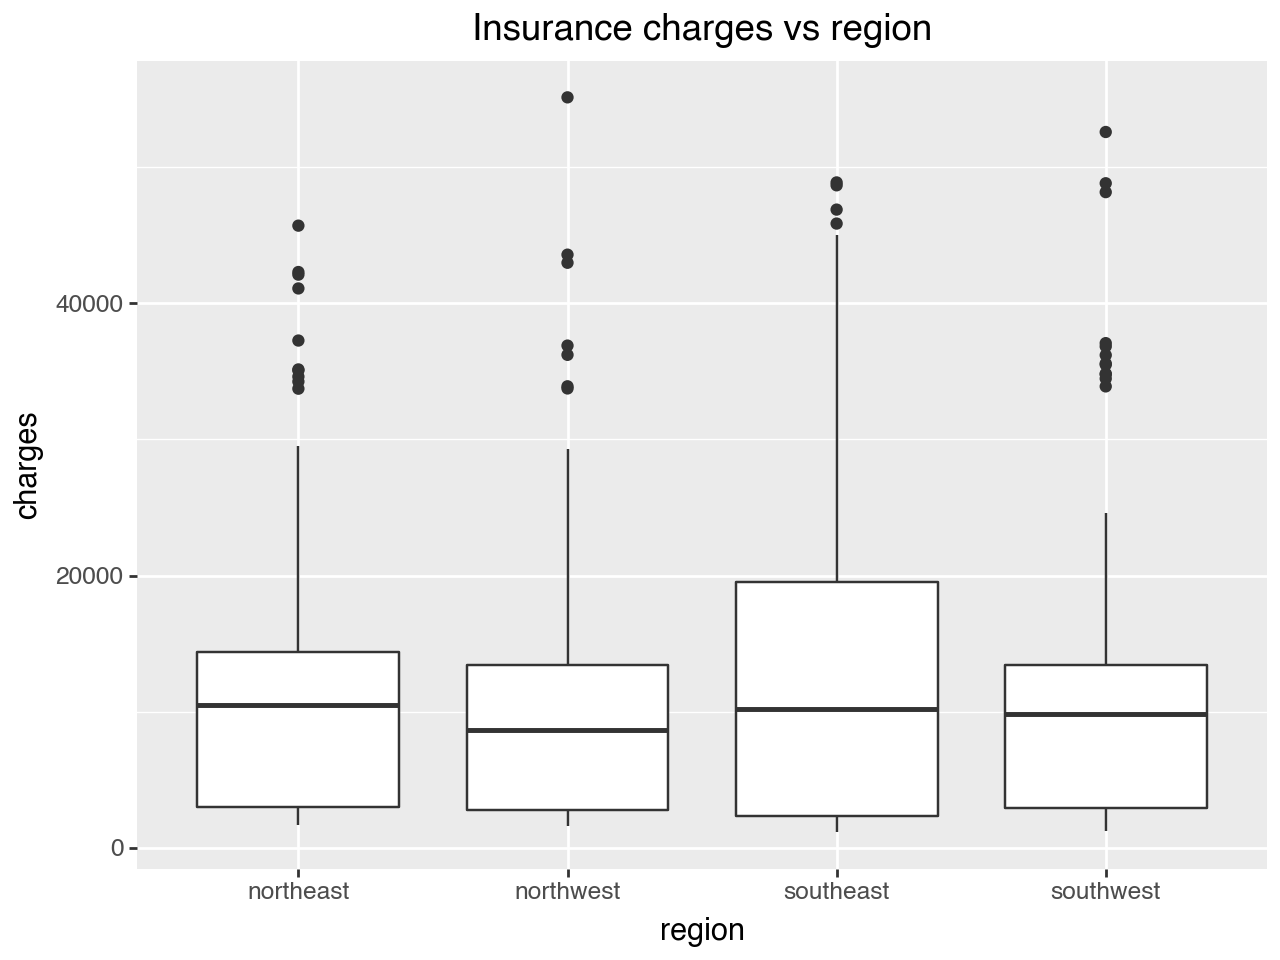

In [5]:
(ggplot(data, aes(x="region", y="charges")) +
 geom_boxplot() +
labs(title = "Insurance charges vs region")
)

From the box plot of the four regions and the insurance costs associated with them there is no clear trend or difference between the regions that can be seen from the plot.

Part 2

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X = data.drop("charges", axis = 1)
y = data["charges"]



X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
#1
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [9]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 116312965.46967709
Test R^2: 0.12323119978401942
intercept: 12562.970083433436
coefficients: [3567.33582219]
Test MSE: 116312965.46967709
Test R^2: 0.12323119978401942
intercept: 12562.970083433436
coefficients: [3567.33582219]


In [10]:
#2
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex_male"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex_male']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [11]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 115511829.64685927
Test R^2: 0.12927017309491096
intercept: 2.0042189494870804e+18
coefficients: [-2.00421895e+18 -2.00421895e+18  3.69380432e+03]
Test MSE: 115511829.64685927
Test R^2: 0.12927017309491096
intercept: 2.0042189494870804e+18
coefficients: [-2.00421895e+18 -2.00421895e+18  3.69380432e+03]


In [12]:
#3
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["smoker_yes"]),
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['smoker_yes']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['age'])])),
                ('linear_regression', LinearRegression())])

In [13]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
train_pred = lr_fitted.predict(X_train)
test_pred = lr_fitted.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
intercept = lr_fitted.named_steps['linear_regression'].intercept_
coefficient = lr_fitted.named_steps['linear_regression'].coef_

# printing results
print("Test MSE:", test_mse)
print("Test R^2:", test_r2)
print("intercept:", intercept)
print("coefficients:", coefficient)

Test MSE: 26539800.809472583
Test R^2: 0.7999426012420024
intercept: -2.785880121634034e+17
coefficients: [2.78588012e+17 2.78588012e+17 4.22293275e+03]
Test MSE: 26539800.809472583
Test R^2: 0.7999426012420024
intercept: -2.785880121634034e+17
coefficients: [2.78588012e+17 2.78588012e+17 4.22293275e+03]


Model three fits the data better it has a r2 of 0.799 compared to model 2 with  r2 of 0.1292. Also the test MSE is 26539800.809472583 compared to model 2 which is 115511829.64685927. We not only have a higher r2 which is the proportion of the varitaion in y explanied by the x's for model 3 but also a lower MSE which is ideal when fitting models.

Part 3

In [ ]:
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["Gr Liv Area", "TotRms AbvGrd"])
  ],
  remainder = "drop"
)


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

lr_pipeline